# Clustered dotplots

In [1]:
library(tidyverse)
library(ggdendro)
library(cowplot)
library(ggtree)
library(patchwork)

-- Attaching packages --------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------------------------------------------------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 

ggtree v2.3.7  For help: https://yulab-smu.github.io/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

- Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics, 2020, 69:e96. doi:10.1002/cpbi.96
- Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for 

In [2]:
save_plot <- function(p, fn, w, h){
    for(ext in c(".pdf", ".png", ".svg")){
        ggsave(filename=paste0(fn,ext), plot=p, width=w, height=h)
    }
}

get_xci_enrichment <- function(){
    return(read_tsv("../../_m/xci_enrichment_analysis.txt"))
}

## Get data

In [3]:
xci <- get_xci_enrichment()
xci %>% head(2)


-- Column specification --------------------------------------------------------------------------------------------------------------------------------------
cols(
  `XCI status` = col_character(),
  OR = col_double(),
  PValue = col_double(),
  Direction = col_character(),
  FDR = col_double()
)




XCI status,OR,PValue,Direction,FDR
<chr>,<dbl>,<dbl>,<chr>,<dbl>
escape,196.142534,1.875301e-37,All,8.438853e-37
variable,4.775034,1.931786e-01,All,3.477215e-01


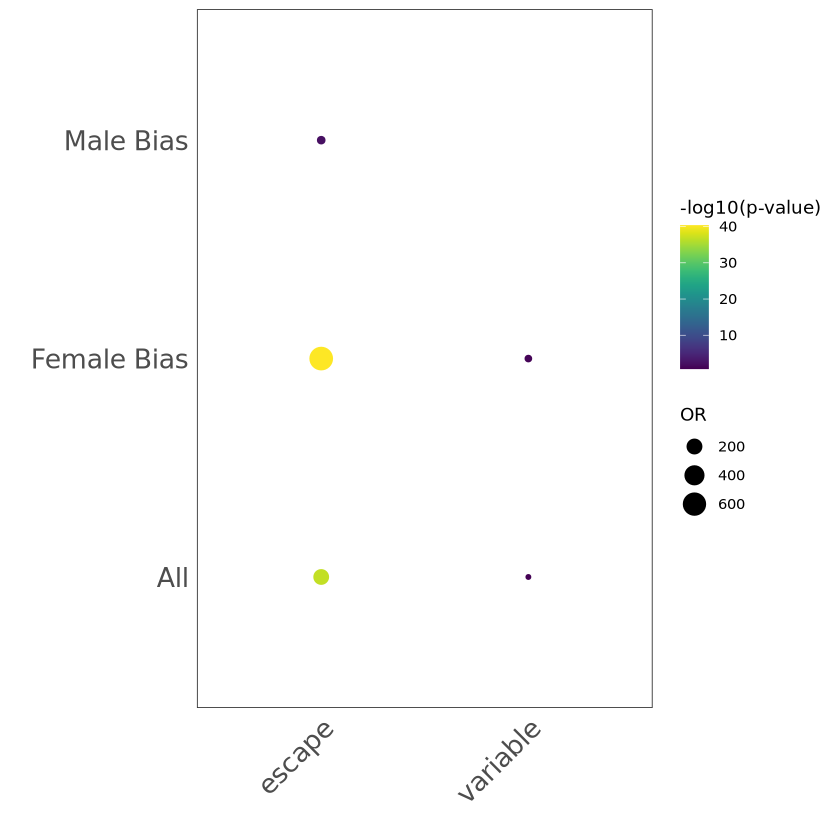

In [7]:
dotplot <- xci %>% mutate_if(is.character, as.factor) %>%
    mutate(`-log10(p-value)` = -log10(PValue)) %>% 
    filter(OR > 0) %>% 
    ggplot(aes(x=`XCI status`, y=Direction, size=OR, color=`-log10(p-value)`)) + 
    geom_point() + ylab('') + xlab('') +
    scale_color_gradientn(colours = viridis::viridis(20), 
                          oob = scales::squish) + 
    theme_bw() + 
    theme(axis.line  = element_blank(), 
          axis.text.x = element_text(angle = 45, hjust=1), 
          axis.text = element_text(size=16), 
          axis.ticks = element_blank(), 
          legend.position="right", 
          panel.grid = element_blank(), 
          strip.text=element_text(size=16, face="bold"))
save_plot(dotplot, "dotplot_enrichment_xci", 5, 4)
dotplot

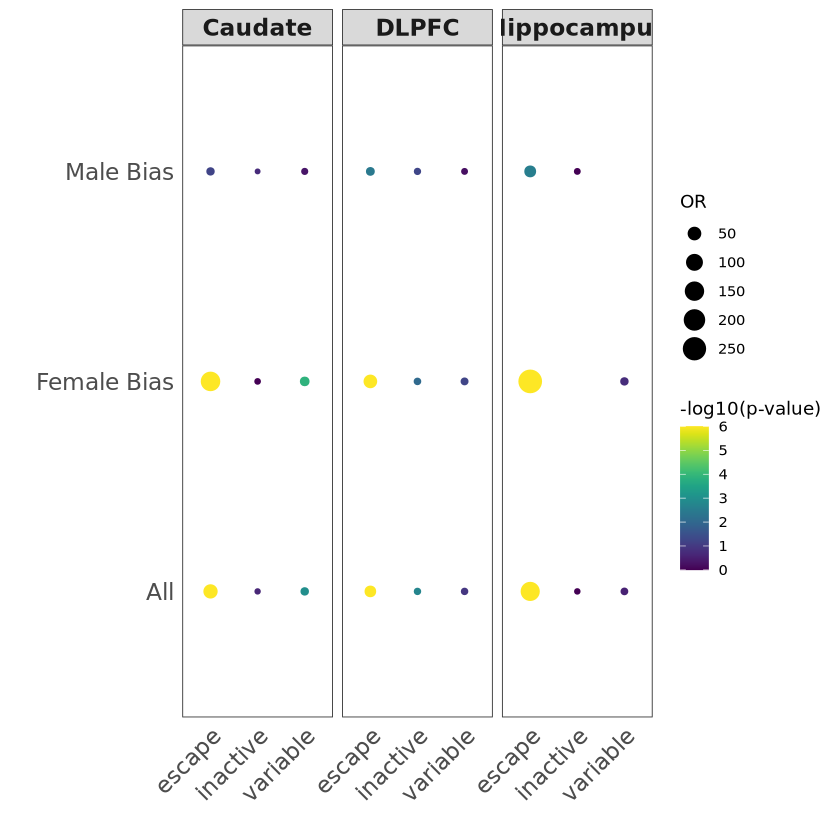

In [41]:
dotplot <- xci %>% 
    mutate(`-log10(p-value)` = -log10(PValue)) %>% 
    filter(OR > 0) %>% 
    ggplot(aes(x=`XCI status`, y=Direction, size=OR, color=`-log10(p-value)`)) + 
    geom_point() + ylab('') + xlab('') + 
    scale_color_gradientn(colours = viridis::viridis(20), 
                          oob = scales::squish, limits=c(0, 6)) + 
    theme_bw() + 
    theme(axis.line  = element_blank(), 
          axis.text.x = element_text(angle = 45, hjust=1), 
          axis.text = element_text(size=16), 
          axis.ticks = element_blank(), 
          legend.position="right", 
          panel.grid = element_blank(), 
          strip.text=element_text(size=16, face="bold"))
save_plot(dotplot, "dotplot_enrichment_xci_limit_pval", 5, 4)
dotplot